# TP : recherche de valeurs approchées

Dans ce TP, on va chercher à résoudre des problèmes de calcul scientifique en donnant une approximation de la valeur théorique de la solution, et en essayant de quantifier la précision avec laquelle on approche cette valeur.

## I. Calcul de la limite d'une série

On sait (résultat démontré par Euler au 18ème siècle) que 
$$
(Euler) \quad \sum_{k=1}^\infty \frac{1}{k^2} = \frac{\pi^2}{6}
$$
par ailleurs, on montre facilement que 
$$
\sum_{k=n+1}^\infty \frac{1}{k^2} \leq \frac{1}{n}.
$$

On va donc utiliser ces résultats pour déterminer une valeur approchée de $\pi^2$. Pour cela on introduit des sommes partielles 
$$
S_n = \sum_{k=1}^n \frac{1}{k^2} 
$$
et on approxime $\frac{\pi^2}{6}$ par $S_n$ pour $n$ suffisamment grand.


**Exercice** Ecrire une fonction `S(n)` qui prend en argument un entier $n$ et rend la somme partielle $S_n$.

In [1]:
def S(n):
    s = 0
    for k in range(1,n+1):
        s += 1/k**2
    return s

**Exercice** Faire calculer $S_n$ avec $n=10^i$, pour $i$ variant de 1 à 6

In [4]:
for i in range(1,7):
    n = 10**i
    print(f"S({n}) = {S(n)}")

S(10) = 1.5497677311665408
S(100) = 1.6349839001848923
S(1000) = 1.6439345666815615
S(10000) = 1.6448340718480652
S(100000) = 1.6449240668982423
S(1000000) = 1.64493306684877


**Question** Quelle valeur $N$ de $n$ doit-on choisir pour que $S_n$ nous donne une approximation de la limite à $10^{-8}$ près ?

*On a vu que l'erreur d'approximation $\frac{\pi^2}{6}- S_n$ est majorée par $\frac{1}{n}$. Il suffit donc de prendre $N=10^8$.*

**Exercice** Calculer $S_N$ et $S_{2N}$.  *On s'armera de patience, car le calcul prend plusieurs minutes sur une machine raisonnablement puissante.* 

In [7]:
N = 10 ** 8
print(f"S({N}) -> {S(N)}")
print(f"S({2*N}) -> {S(2*N)}")

S(100000000) -> 1.644934057834575
S(200000000) -> 1.644934057834575


**Question** Compte tenu de ce calcul, peut-on espérer atteindre une précision meilleure que $10^{-8}$ par cette méthode ? Expliquez pourquoi.

*On voit que la suite des valeurs calculées de `S(n)` est stationnaire à partir de $10^8$. Or la suite $(S_n)$ est strictement croissante. Pousser le calcul plus loin que $10^8$ est donc sans effet.*

*Cela vient du fait que les valeurs de $\frac{1}{k^2}$, pour $k\geq 10^8$, sont plus petites que $10^{-16}$ et sont donc négligées quand on les ajoute à un nombre de l'ordre de grandeur de 1.*

**Exercice** Ecrire une nouvelle fonction `S2(n)` calculant la même somme que `S(n)`, mais en faisant la somme dans l'autre sens, c'est à dire en commençant la somme par les plus petites valeurs. 

Calculer alors `S(10**8)` et `S(2*10**8)`.

In [10]:
def S2(n):
    s = 0
    for k in range(n,0,-1):
        s += 1/k**2
    return s
print(S2(10**8))
print(S2(2*10**8))

1.6449340568482265
1.6449340618482264


*On constate que l'on peut pousser les calculs un peu plus loin. Mais il ne faut pas vraiment espérer beaucoup mieux. Quoi qu'on fasse, on est proche des limites de cette méthode de calcul...*

**Pousser l'approximation plus loin**

On démontre facilement à l'aide de la formule d'Euler une nouvelle formule :

$$
\sum_{k=1}^\infty \frac{(-1)^{k+1}}{k^2} = \frac{\pi^2}{12}
$$


On va donc chercher à approximer $\frac{\pi^2}{12}$ par les sommes partielles
$$
T_n = \sum_{k=1}^n \frac{(-1)^{k+1}}{k^2}
$$

La théorie des séries alternées nous donne maintenant  la majoration de l'erreur d'approximation :
$$
\left|
T_n -\frac{\pi^2}{12}
\right|
< \frac{1}{n^2}.
$$

**Exercice** Ecrire une fonction `T(n)` calculant $T_n$.

Utiliser cette fonction pour obtenir une approximation de $\frac{\pi^2}{12}$ à $10^{-12}$ près.

Vérifier ce calcul en utilisant la valeur de $\pi$ contenue dans le module`math`.

In [15]:
def T(n):
    s = 0
    for k in range(1,n+1):
        s += (-1)**(k+1) / k**2
    return s

valeur = T(10**6)

print("valeur approchée :",valeur) 

from math import pi

print(pi**2/12)

print(abs(pi**2/12 -valeur))


valeur approchée : 0.8224670334235836
0.8224670334241132
5.295763827461997e-13


## II. Calcul numérique de la dérivée d'une fonction

Vous avez appris la définition suivante de la dérivée d'une fonction $f$ :
$$
f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$
Si vous disposez d'une fonction numérique $f$ donnée par un programme `f`, vous pouvez trouver une approximation numérique de $f'(x_0)$ en calculant `(f(x0+h)-f(x0))/h` pour `h` "suffisament petit". La question est de savoir quelle est la bonne valeur de `h` à choisir.

Nous allons tester ici cette méthode en prenant pour exemple la fonction $f:x\mapsto \sin x$ et le réel $x_0=1$. Dans ce cas, on connait explicitement la dérivée $f'(x_0)=\cos x_0$, et nous pourrons donc tester l'erreur d'approximation obtenue pour différentes valeurs de $h$.

**Exercice** 
- Définir la fonction `f` et sa fonction dérivée `g`.

- Écrire une fonction `derivee(f,x0,h)` prenant en argument une fonction `f` et deux réels `x0` et `h` et rendant `(f(x0+h)-f(x0))/h`.

In [20]:
from math import sin, cos

x0 = 1

def f(x):
    return sin(x)

def g(x):
    return cos(x)

def derivee(f,x0,h):
    return (f(x0+h)-f(x0))/h

**Exercice** Pour des valeurs de $h$  valant $2^{-1}, 2^{-2},\ldots,2^{-40}$, calculer les erreurs d'approximation 
```
err(h) = abs( derivee(f,x0,h)-g(x) )
```
et afficher `err(h)` en fonction de `h`, en utilisant une représentation logarithmique.

Text(0, 0.5, "erreur d'approximation")

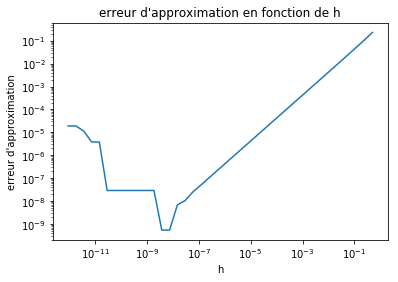

In [34]:
import matplotlib.pyplot as plt
H = [2**(-k) for k in range(1,41)]  # les valeurs de h
E = [abs(derivee(f,x0,h)-g(x0)) for h in H]  # les erreurs d'approximation
plt.plot(H,E)
plt.xscale('log')
plt.yscale('log')
plt.title("erreur d'approximation en fonction de h")
plt.xlabel("h")
plt.ylabel("erreur d'approximation")

**Question** 
- Quelle est la valeur optimale pour $h$ et quelle est la meilleure précision que l'obtient pour le calcul de $f'(x_0)$ ?
- Pour quelle raison ne peut-on pas obtenir une meilleure précision avec cette méthode ?

*On constate que, pour $h>10^{-8}$, l'erreur d'approximation décroit comme $h$. En revanche, lorsque $h$ est pris plus petit que $10^{-8}$, l'erreur d'approximation se met à remonter. Il ne sert donc à rien de prendre un $h$ plus petit que $10^{-8}$. Pour cette valeur de $h$, on constate une erreur de l'ordre de $10^{-8}$ ou $10^{-9}$.*

On peut utiliser une autre formule pour calculer la dérivée en utilisant la formule suivante, qui se déduit d'une application de la Formule de Taylor-Young, lorsque $f$ est au moins de classe $\mathcal{C}^3$ :
$$
f'(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h} + \frac{f^{(3)}(x_0)}{6} h^2+ o(h^2)
$$

**Exercice** Écrire une fonction `derivee2(f,x0,h)` retournant `(f(x0+h)-f(x0-h))/2`, et faire la même étude que précédemment avec cette "dérivée centrée".

Text(0, 0.5, "erreur d'approximation")

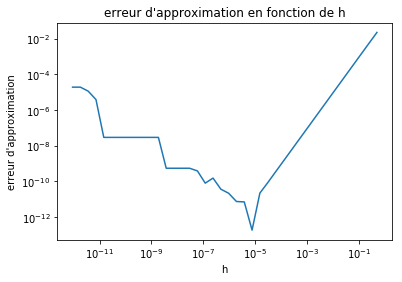

In [25]:
def derivee2(f,x0,h):
    return (f(x0+h) - f(x0-h)) / (2*h)

import matplotlib.pyplot as plt
H = [2**(-k) for k in range(1,41)]  # les valeurs de h
E = [abs(derivee2(f,x0,h)-g(x0)) for h in H]  # les erreurs d'approximation
plt.plot(H,E)
plt.xscale('log')
plt.yscale('log')
plt.title("erreur pour la dérivation centrée")
plt.xlabel("h")
plt.ylabel("erreur d'approximation")

**Amélioration de la dérivée centrée**

**Exercice** Définir de même une fonction `derivee3(f,x0,h)` rendant `4*derivee2(f,x0,h) - derivee2(f,x0,2*h))/3`, et étudier le comportement de l'erreur obtenue avec cette troisième formule.

Text(0, 0.5, "erreur d'approximation")

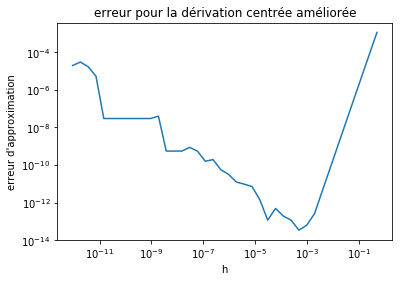

In [33]:
def derivee3(f,x0,h):
    return (4*derivee2(f,x0,h) - derivee2(f,x0,2*h))/3

import matplotlib.pyplot as plt
H = [2**(-k) for k in range(1,41)]  # les valeurs de h
E = [abs(derivee3(f,x0,h)-g(x0)) for h in H]  # les erreurs d'approximation
plt.plot(H,E)
plt.xscale('log')
plt.yscale('log')
plt.title("erreur pour la dérivation centrée améliorée")
plt.xlabel("h")
plt.ylabel("erreur d'approximation")